### Environment Setup

In [1]:
try:
    from databook_utils.dandi_utils import dandi_download_open
except:
    !git clone https://github.com/AllenInstitute/openscope_databook.git
    %cd openscope_databook
    %pip install -e .

c:\Users\carter.peene\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
c:\Users\carter.peene\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\.libs\libopenblas.FB5AE2TYXYH2IJRDKGDGQ3XBKLKTF43H.gfortran-win_amd64.dll
c:\Users\carter.peene\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\.libs\libopenblas.XWYDX2IKJW2NMTWSFYNGFUWKQU3LYTCZ.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [2]:
from pynapple.process.correlograms import cross_correlogram, compute_crosscorrelogram
from pynapple.core import TsGroup, Ts
import matplotlib.pyplot as plt


### Download NWB Files

In [3]:
dandiset_id = "000021"
dandi_filepath = "sub-703279277/sub-703279277_ses-719161530.nwb"
download_loc = "."
dandi_api_key = None

In [4]:
io = dandi_download_open(dandiset_id, dandi_filepath, download_loc, dandi_api_key=dandi_api_key)
nwb = io.read()

A newer version (0.59.1) of dandi/dandi-cli is available. You are using 0.55.1


File already exists
Opening file


c:\Users\carter.peene\AppData\Local\Programs\Python\Python39\lib\site-packages\hdmf\spec\namespace.py:531: UserWarning: Ignoring cached namespace 'hdmf-common' version 1.1.3 because version 1.8.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."
c:\Users\carter.peene\AppData\Local\Programs\Python\Python39\lib\site-packages\hdmf\spec\namespace.py:531: UserWarning: Ignoring cached namespace 'core' version 2.2.2 because version 2.5.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."


In [5]:
units = nwb.units
nwb
units[:10]

,waveform_duration,cluster_id,peak_channel_id,cumulative_drift,amplitude_cutoff,snr,recovery_slope,isolation_distance,nn_miss_rate,silhouette_score,...,local_index,spread,waveform_halfwidth,d_prime,presence_ratio,repolarization_slope,nn_hit_rate,spike_times,spike_amplitudes,waveform_mean
id,,,,,,,,,,,,,,,,,,,,,
950921187,0.604355,4,850249267,481.80,0.425574,2.209140,-0.118430,17.537571,0.009496,0.036369,...,4,50.0,0.357119,2.962274,0.99,0.381716,0.473829,"[1.0439430431793884, 1.543311060144649, 2.7287...","[0.0001908626967721937, 0.00016134635752077775...","[[0.0, 0.5961149999999966, 5.378099999999993, ..."
950921172,0.521943,3,850249267,681.53,0.390098,1.959983,-0.109729,14.677643,0.003857,0.103446,...,3,40.0,0.260972,2.067810,0.99,0.536663,0.445946,"[10.406435026164546, 17.127986534673788, 18.48...","[0.00014485615850768024, 0.0001722424107984555...","[[0.0, -1.341600000000002, -0.4586399999999933..."
950921152,0.467002,2,850249267,1070.71,0.500000,2.522905,-0.109867,15.783665,0.017776,0.027818,...,2,50.0,0.247236,2.220043,0.99,0.566559,0.284058,"[1.2775103414155262, 2.3915133536963493, 3.701...","[0.00014859435856024575, 0.0001531048673600236...","[[0.0, -0.6427199999999993, -2.836079999999998..."
950921135,0.467002,1,850249267,253.42,0.500000,2.803475,-0.150379,26.666930,0.023742,0.076530,...,1,40.0,0.233501,2.339206,0.99,0.669090,0.590737,"[9.473732504122962, 13.198542576065163, 18.302...","[0.00032386170367170055, 0.0004518112387675137...","[[0.0, -3.2800950000000078, -6.087510000000009..."
950921111,0.439531,0,850249267,141.82,0.018056,4.647943,-0.328727,66.901065,0.006595,NaN,...,0,30.0,0.219765,4.395994,0.99,1.261416,0.952667,"[1.1677100445138795, 1.1707767194728813, 1.349...","[0.00015644521007973124, 0.000214412247939483,...","[[0.0, -0.9291749999999945, -6.120270000000007..."
950927711,1.455946,482,850249273,2.46,0.000895,1.651500,-0.039932,39.400278,0.000033,NaN,...,464,100.0,0.274707,5.557479,0.37,0.467365,0.000000,"[2613.8652081509977, 2624.5193369599215, 2734....","[0.00012946663895843286, 0.0001203425053985725...","[[0.0, 6.3216435986159105, 10.324204152249129,..."
950921285,2.087772,11,850249273,318.53,0.036848,1.379817,NaN,27.472722,0.000903,0.291953,...,11,100.0,0.288442,2.751337,0.89,0.372116,0.258065,"[39.04904580954626, 39.457346913598556, 40.495...","[7.768399792002802e-05, 8.405736507197006e-05,...","[[0.0, 5.330324999999991, 2.4261899999999486, ..."
950921271,0.947739,10,850249273,1008.50,0.001727,1.420617,-0.008204,30.027595,0.000707,0.406673,...,10,100.0,0.288442,3.847234,0.96,0.498618,0.796491,"[16.751918851114475, 26.127977537450867, 28.65...","[0.00016516929470324686, 0.0001501058102103845...","[[0.0, -3.103230000000032, 5.680349999999983, ..."
950921260,0.453266,9,850249273,175.00,0.000081,4.969091,-0.184456,89.804006,0.000000,0.223876,...,9,60.0,0.192295,5.274090,0.99,1.140487,0.997333,"[0.9620761551434307, 2.092045877265143, 2.4040...","[0.0003836112198262231, 0.0004093908262843732,...","[[0.0, 1.9104149999999982, -7.270770000000016,..."


In [6]:
spikes0 = units["spike_times"][0]
spikes1 = units["spike_times"][1]

In [7]:
xcg, bins = cross_correlogram(spikes1, spikes0, 0.01, 1)

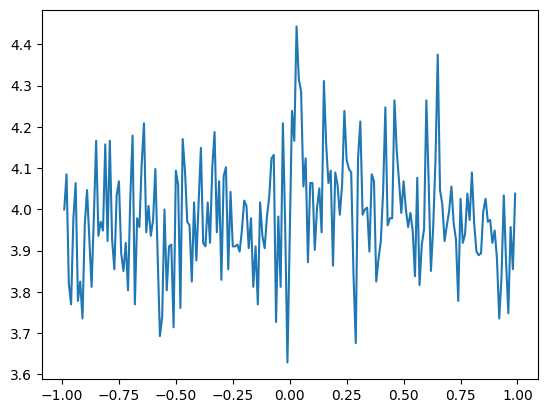

In [8]:
plt.plot(bins, xcg)

In [9]:
### make dictionary, convert units data to tsd obj
### make tsgroup
### run xcg_pairs

In [52]:
unit_spikes_map = {i: Ts(units["spike_times"][i]) for i in range(20)}
len(unit_spikes_map)

20

In [53]:
tsg = TsGroup(unit_spikes_map)
tsg

  Index    rate
-------  ------
      0    3.94
      1    2.43
      2    3.75
      3    7.12
      4   22.6
      5    0.03
      6    0.53
      7    2.31
      8   11.32
      9   19.51
     10    4.64
     11    7.17
     12    3.68
     13   13.87
     14   14.54
     15    9.96
     16    0.04
     17   20.47
     18   10.54
     19   10.42

In [54]:
xcg_pairs = compute_crosscorrelogram(tsg, 0.1, 1)

In [55]:
xcg_pairs

0                                                               \
            1         2         3         4         5         6         7    
-0.9  0.996986  1.012846  0.996766  1.051669  0.957811  1.000700  1.026683   
-0.8  1.006299  1.028841  1.001747  1.052750  1.063258  0.980459  1.051030   
-0.7  1.010630  1.014880  0.996729  1.046994  0.949023  0.997738  1.045797   
-0.6  1.017452  1.010881  1.009386  1.051681  0.940236  1.025384  1.038060   
-0.5  1.027848  1.027859  1.004552  1.052530  0.984172  0.952812  0.996647   
-0.4  1.013121  1.038313  1.020382  1.056960  0.808427  0.925166  0.972072   
-0.3  1.017127  1.023790  1.022338  1.054518  0.773278  0.894557  0.989138   
-0.2  1.037593  1.055711  1.021083  1.060553  0.773278  0.868886  0.929294   
-0.1  1.025790  1.070584  1.037467  1.063763  0.659044  0.847164  0.913138   
 0.0  1.036619  1.107416  1.058279  1.055123  0.544810  0.797795  0.852952   
 0.1  1.005649  1.051712  1.008869  1.038912  0.790853  0.883203  0.930659   
 0.2  0.997095  1.028701  1.007836  1.043680  0.861151  0.887646  0.953072   
 0.3  1.017561  1.044837  1.004699  1.051902  0.905087  0.885671  0.947270   
 0.4  1.008248  1.036208  0.994367  1.054820  0.808427  0.894064  0.979467   
 0.5  1.002401  1.025193  0.988647  1.048576  0.887512  0.927141  0.986635   
 0.6  1.001967  1.027158  0.991932  1.047576  0.826002  0.950344  0.986294   
 0.7  1.003808  1.033121  0.976728  1.044122  0.940236  0.960711  0.995396   
 0.8  1.020376  1.018669  0.986027  1.050971  0.949023  0.973547  0.998809   
 0.9  0.994821  1.020212  1.001600  1.040971  0.975385  0.988357  0.988569   

                                    ...        15                      \
            8         9         10  ...        16        17        18   
-0.9  1.058985  1.039420  1.077432  ...  1.610070  1.162730  1.127015   
-0.8  1.075513  1.046652  1.098600  ...  1.686880  1.166188  1.125152   
-0.7  1.064533  1.041992  1.103525  ...  1.491899  1.171413  1.130021   
-0.6  1.071219  1.037710  1.048000  ...  1.580527  1.168661  1.125832   
-0.5  1.074445  1.050005  1.031473  ...  1.663246  1.177913  1.140036   
-0.4  1.073935  1.046692  1.001702  ...  1.713468  1.185448  1.141593   
-0.3  1.066320  1.044484  1.014833  ...  1.692789  1.168641  1.116350   
-0.2  1.090115  1.046894  0.994627  ...  1.666200  1.200108  1.194317   
-0.1  1.089279  1.051056  0.945951  ...  1.595298  1.148507  1.082798   
 0.0  1.195531  1.010856  0.905822  ...  1.689834  1.207065  1.169330   
 0.1  1.070267  1.048820  1.002155  ...  1.680972  1.243362  1.203336   
 0.2  1.059797  1.052025  1.023096  ...  1.722331  1.163872  1.110229   
 0.3  1.075049  1.043918  1.032945  ...  1.825730  1.203978  1.194297   
 0.4  1.076001  1.041629  1.062094  ...  1.686880  1.179929  1.131736   
 0.5  1.070313  1.040443  1.073131  ...  1.846410  1.181396  1.154436   
 0.6  1.069269  1.045696  1.094978  ...  1.822776  1.172464  1.145142   
 0.7  1.054528  1.036915  1.086601  ...  1.598252  1.163471  1.134457   
 0.8  1.061167  1.035865  1.085696  ...  1.675063  1.162862  1.132564   
 0.9  1.059240  1.035366  1.089431  ...  1.710514  1.159587  1.129647   

                      16                            17                  18  
            19        17        18        19        18        19        19  
-0.9  1.040773  1.215751  1.375211  1.052590  1.074104  1.030162  1.040503  
-0.8  1.041491  1.281855  1.274790  1.010261  1.076367  1.035473  1.041567  
-0.7  1.048760  1.309159  1.258053  1.100564  1.076142  1.028755  1.037509  
-0.6  1.045141  1.290478  1.299895  0.908670  1.080634  1.024433  1.036765  
-0.5  1.042030  1.312033  1.232948  0.869163  1.083243  1.030637  1.043337  
-0.4  1.043545  1.227247  1.202264  0.852231  1.082116  1.020596  1.036991  
-0.3  1.050904  1.220062  1.157632  0.979219  1.088905  1.019209  1.047320  
-0.2  1.033504  1.234432  1.255264  1.035659  1.091739  1.018249  1.050389  
-0.1  1.068504  1.293352  1.255264  1.069522  1.079589  1.013665  1.0

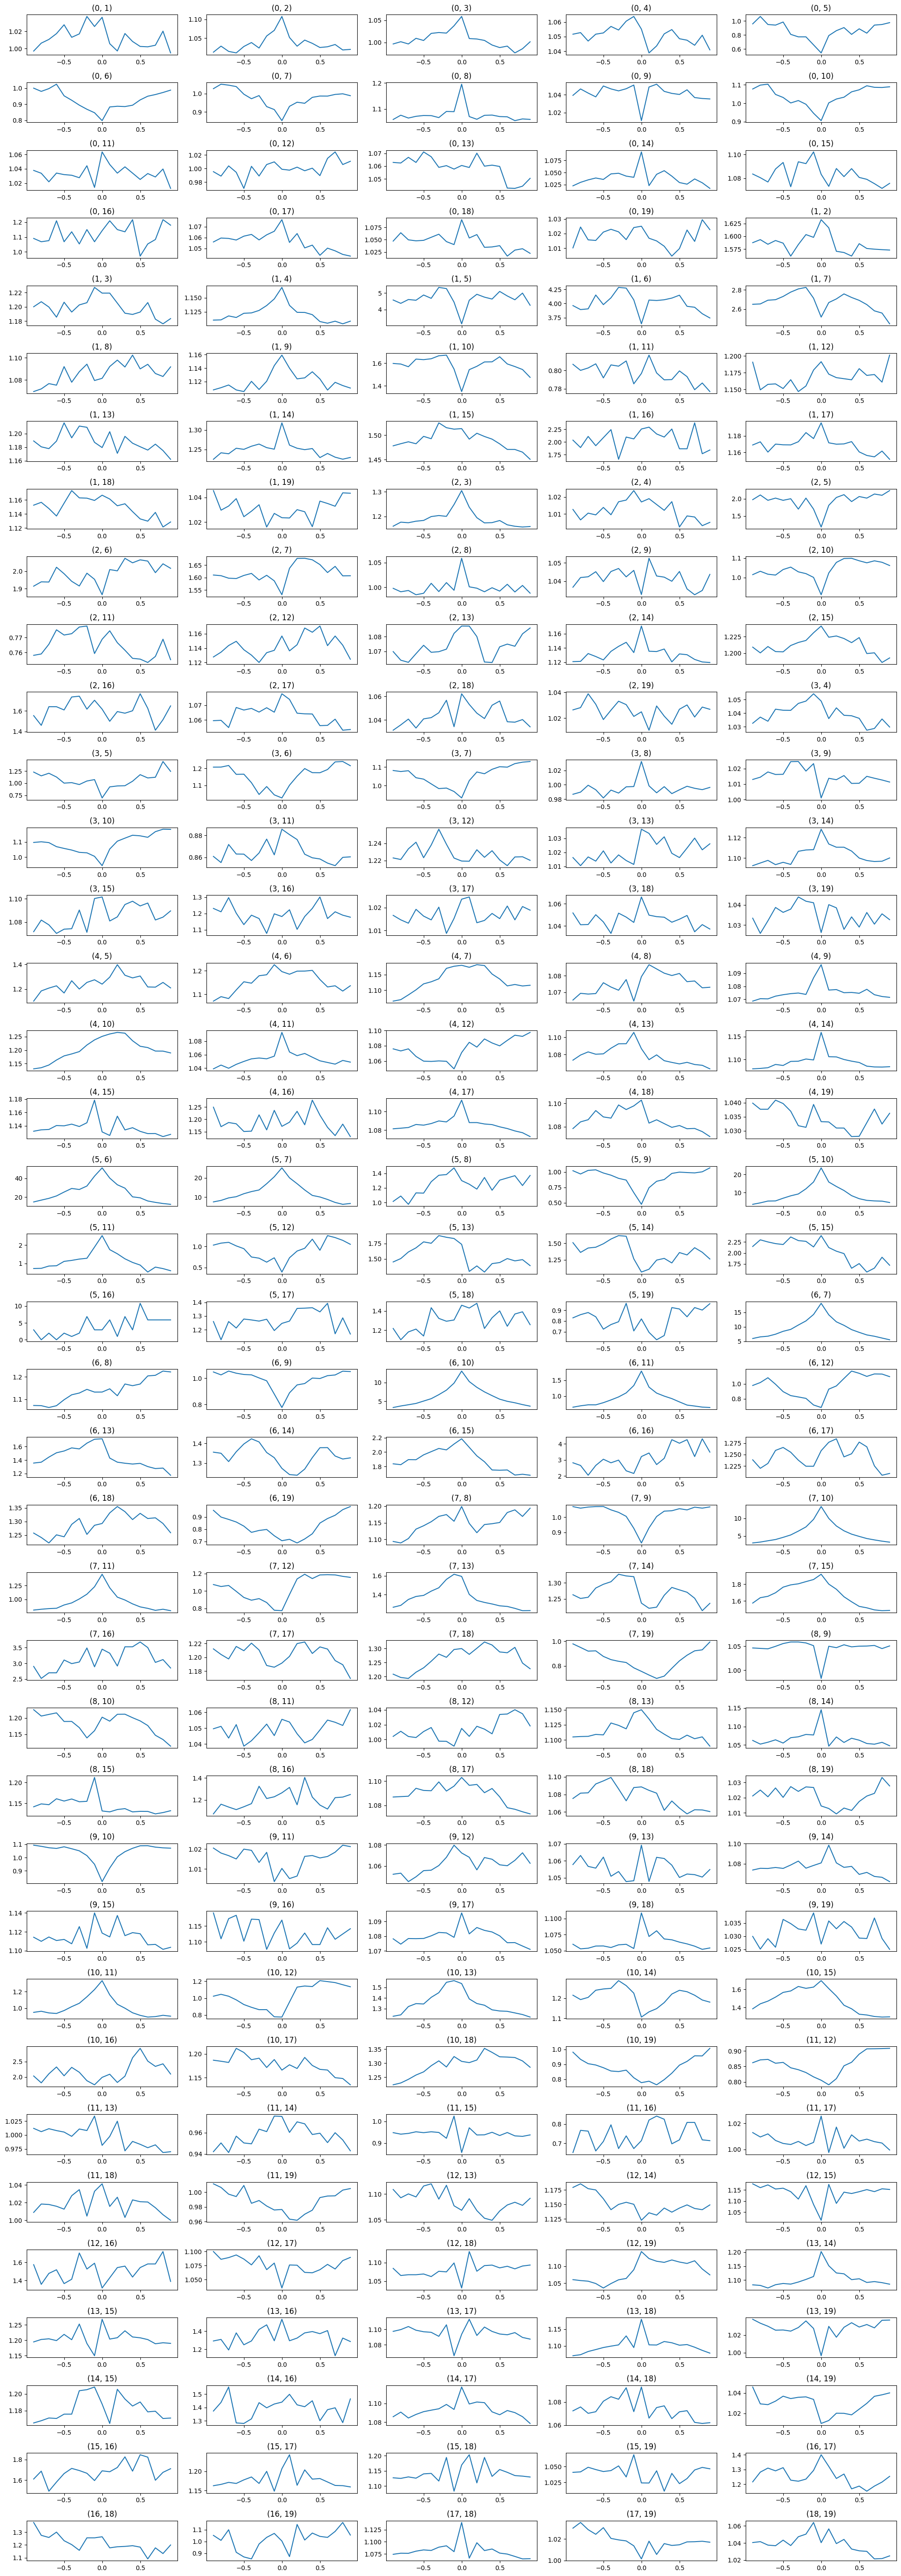

In [92]:
n_cols = 5
n_rows = len(xcg_pairs.columns) // n_cols
fig, axes = plt.subplots(n_rows, n_cols, figsize=(20,1.5*n_rows))

if len(axes.shape) == 1:
    axes = axes.reshape((1, axes.shape[0]))

for i, pair_col in enumerate(xcg_pairs):
    xcg = xcg_pairs[pair_col]
    ax_row = int(i / n_cols)
    ax_col = i % n_cols
    axes[ax_row][ax_col].plot(xcg.index, list(xcg))
    axes[ax_row][ax_col].set_title(pair_col)
    
plt.tight_layout()